# Nielsen Data Science Case Study - Analytics 

By Jackie Petersen

---

In [513]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Part One: Population Statistics

### 1. Import and clean the data set.

In [89]:
data = pd.read_csv('county_census_population.csv')

In [90]:
data.head()

,county name,state,year,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_40_to_44,male_age_45_to_49,male_age_50_to_54,male_age_55_to_59,male_age_60_to_64,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over
0,Madison County,Mississippi,2011.0,50448.0,3279.0,3935.0,3430.0,3380.0,2573.0,3733.0,...,2790.0,3533.0,3580.0,3533.0,1999.0,1348.0,1488.0,930.0,46.0,558.0
1,Kendall County,Illinois,2013.0,60690.0,4435.0,4921.0,5285.0,3706.0,3098.0,4313.0,...,5215.0,3516.0,3985.0,3047.0,1875.0,1641.0,1113.0,879.0,59.0,410.0
2,Bulloch County,Georgia,2013.0,36535.0,2482.0,2555.0,1679.0,4635.0,5110.0,2956.0,...,1805.0,1562.0,2187.0,1493.0,1354.0,1215.0,937.0,729.0,69.0,347.0
3,Toa Alta Municipio,Puerto Rico,2013.0,38861.0,2103.0,1674.0,3543.0,3076.0,2843.0,2414.0,...,2945.0,2726.0,2436.0,1272.0,2472.0,1272.0,1091.0,1054.0,73.0,254.0
4,Liberty County,Georgia,2014.0,31566.0,3528.0,2048.0,1796.0,2205.0,3402.0,3528.0,...,1213.0,1415.0,1516.0,1213.0,1213.0,1078.0,539.0,270.0,101.0,34.0


#### Checking general info for data

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4961 entries, 0 to 4960
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   county name              4959 non-null   object 
 1   state                    4959 non-null   object 
 2   year                     4959 non-null   float64
 3   female_total_population  4959 non-null   float64
 4   female_age_under_5       4960 non-null   float64
 5   female_age_5_to_9        4959 non-null   float64
 6   female_age_10_to_14      4959 non-null   float64
 7   female_age_15_to_19      4959 non-null   float64
 8   female_age_20_to_24      4959 non-null   float64
 9   female_age_25_to_29      4959 non-null   float64
 10  female_age_30_to_34      4959 non-null   float64
 11  female_age_35_to_39      4959 non-null   float64
 12  female_age_40_to_44      4959 non-null   float64
 13  female_age_45_to_49      4959 non-null   float64
 14  female_age_50_to_54     

#### Checking for NaN's

In [92]:
data.isna().sum()

county name                2
state                      2
year                       2
female_total_population    2
female_age_under_5         1
female_age_5_to_9          2
female_age_10_to_14        2
female_age_15_to_19        2
female_age_20_to_24        2
female_age_25_to_29        2
female_age_30_to_34        2
female_age_35_to_39        2
female_age_40_to_44        2
female_age_45_to_49        2
female_age_50_to_54        2
female_age_55_to_59        2
female_age_60_to_64        2
female_age_65_to_69        2
female_age_70_to_74        2
female_age_75_to_79        3
female_age_80_to_84        2
female_age_85_and_over     2
male_total_population      2
male_age_under_5           2
male_age_5_to_9            2
male_age_10_to_14          2
male_age_15_to_19          2
male_age_20_to_24          2
male_age_25_to_29          2
male_age_30_to_34          2
male_age_35_to_39          2
male_age_40_to_44          2
male_age_45_to_49          2
male_age_50_to_54          2
male_age_55_to

> Because there aren't too many NaN values in the dataset, I will drop all of these for the purpose of this study. Normally, I wouldn't drop all of these values without much more consideration.

In [93]:
data = data.dropna()
data.isna().sum() # making sure all nan's are gone

county name                0
state                      0
year                       0
female_total_population    0
female_age_under_5         0
female_age_5_to_9          0
female_age_10_to_14        0
female_age_15_to_19        0
female_age_20_to_24        0
female_age_25_to_29        0
female_age_30_to_34        0
female_age_35_to_39        0
female_age_40_to_44        0
female_age_45_to_49        0
female_age_50_to_54        0
female_age_55_to_59        0
female_age_60_to_64        0
female_age_65_to_69        0
female_age_70_to_74        0
female_age_75_to_79        0
female_age_80_to_84        0
female_age_85_and_over     0
male_total_population      0
male_age_under_5           0
male_age_5_to_9            0
male_age_10_to_14          0
male_age_15_to_19          0
male_age_20_to_24          0
male_age_25_to_29          0
male_age_30_to_34          0
male_age_35_to_39          0
male_age_40_to_44          0
male_age_45_to_49          0
male_age_50_to_54          0
male_age_55_to

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4953 entries, 0 to 4958
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   county name              4953 non-null   object 
 1   state                    4953 non-null   object 
 2   year                     4953 non-null   float64
 3   female_total_population  4953 non-null   float64
 4   female_age_under_5       4953 non-null   float64
 5   female_age_5_to_9        4953 non-null   float64
 6   female_age_10_to_14      4953 non-null   float64
 7   female_age_15_to_19      4953 non-null   float64
 8   female_age_20_to_24      4953 non-null   float64
 9   female_age_25_to_29      4953 non-null   float64
 10  female_age_30_to_34      4953 non-null   float64
 11  female_age_35_to_39      4953 non-null   float64
 12  female_age_40_to_44      4953 non-null   float64
 13  female_age_45_to_49      4953 non-null   float64
 14  female_age_50_to_54     

> I see that all of the numerical columns are listed as floats - I'm going to convert them to int to make it easier for analysis.

In [95]:
data_int = data.drop(['county name', 'state'], axis='columns').astype(int) # separating out the numerical columns to convert easier
data_int.head()

,year,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,female_age_30_to_34,female_age_35_to_39,...,male_age_40_to_44,male_age_45_to_49,male_age_50_to_54,male_age_55_to_59,male_age_60_to_64,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over
0,2011,50448,3279,3935,3430,3380,2573,3733,2724,4288,...,2790,3533,3580,3533,1999,1348,1488,930,46,558
1,2013,60690,4435,4921,5285,3706,3098,4313,6136,7229,...,5215,3516,3985,3047,1875,1641,1113,879,59,410
2,2013,36535,2482,2555,1679,4635,5110,2956,1679,1423,...,1805,1562,2187,1493,1354,1215,937,729,69,347
3,2013,38861,2103,1674,3543,3076,2843,2414,2687,2064,...,2945,2726,2436,1272,2472,1272,1091,1054,73,254
4,2014,31566,3528,2048,1796,2205,3402,3528,2237,1670,...,1213,1415,1516,1213,1213,1078,539,270,101,34


In [96]:
data_obj = data[['county name', 'state']] # separating out the object columns to combine after int conversion
data_obj.head()

,county name,state
0,Madison County,Mississippi
1,Kendall County,Illinois
2,Bulloch County,Georgia
3,Toa Alta Municipio,Puerto Rico
4,Liberty County,Georgia


In [97]:
data = pd.concat([data_obj, data_int], join='outer', axis=1) # combining the df back together
data.head()

,county name,state,year,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_40_to_44,male_age_45_to_49,male_age_50_to_54,male_age_55_to_59,male_age_60_to_64,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over
0,Madison County,Mississippi,2011,50448,3279,3935,3430,3380,2573,3733,...,2790,3533,3580,3533,1999,1348,1488,930,46,558
1,Kendall County,Illinois,2013,60690,4435,4921,5285,3706,3098,4313,...,5215,3516,3985,3047,1875,1641,1113,879,59,410
2,Bulloch County,Georgia,2013,36535,2482,2555,1679,4635,5110,2956,...,1805,1562,2187,1493,1354,1215,937,729,69,347
3,Toa Alta Municipio,Puerto Rico,2013,38861,2103,1674,3543,3076,2843,2414,...,2945,2726,2436,1272,2472,1272,1091,1054,73,254
4,Liberty County,Georgia,2014,31566,3528,2048,1796,2205,3402,3528,...,1213,1415,1516,1213,1213,1078,539,270,101,34


> Now the float columns are all ints

#### Checking for duplicates

In [98]:
data[data.duplicated()]

,county name,state,year,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_40_to_44,male_age_45_to_49,male_age_50_to_54,male_age_55_to_59,male_age_60_to_64,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over
710,Blue Earth County,Minnesota,2015,32843,2098,1803,1442,2983,5867,2065,...,1485,1551,1651,1485,2113,1254,1056,594,561,396
2522,Burke County,North Carolina,2015,44646,2145,2324,2547,2235,2547,2235,...,2208,3444,3444,3179,2561,3311,1413,1192,1192,486
3610,Anoka County,Minnesota,2015,171348,9948,10634,12521,10977,9948,9605,...,11048,12775,13810,12429,10530,7078,5697,2589,2244,1726
4094,Buncombe County,North Carolina,2015,132335,6742,7668,5553,6742,7536,9651,...,7500,7742,8105,8226,8589,7863,4234,2782,3387,1573
4399,San Joaquin County,California,2015,364193,25155,29529,25884,26977,24790,24425,...,23862,23862,23139,20247,18800,14462,9400,5423,4700,4700
4685,San Francisco County,California,2015,425064,20403,16152,12752,16152,25929,49732,...,32981,33421,30783,27265,25945,21108,11434,9235,7476,7036
4810,Wayne County,Michigan,2015,913113,55700,57526,56613,57526,63005,63005,...,49927,56697,60082,60082,51620,38080,26233,18617,11001,10155
4938,San Diego County,California,2015,1638628,105082,101799,91947,100157,118218,134637,...,104429,104429,107745,97799,87853,66304,48071,29837,24864,21549


> There are 8 duplicated rows in the data. I will drop these rows and keep the first instance.

In [99]:
data = data.drop_duplicates(keep='first') # dropping the duplicates
data.head()

,county name,state,year,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_40_to_44,male_age_45_to_49,male_age_50_to_54,male_age_55_to_59,male_age_60_to_64,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over
0,Madison County,Mississippi,2011,50448,3279,3935,3430,3380,2573,3733,...,2790,3533,3580,3533,1999,1348,1488,930,46,558
1,Kendall County,Illinois,2013,60690,4435,4921,5285,3706,3098,4313,...,5215,3516,3985,3047,1875,1641,1113,879,59,410
2,Bulloch County,Georgia,2013,36535,2482,2555,1679,4635,5110,2956,...,1805,1562,2187,1493,1354,1215,937,729,69,347
3,Toa Alta Municipio,Puerto Rico,2013,38861,2103,1674,3543,3076,2843,2414,...,2945,2726,2436,1272,2472,1272,1091,1054,73,254
4,Liberty County,Georgia,2014,31566,3528,2048,1796,2205,3402,3528,...,1213,1415,1516,1213,1213,1078,539,270,101,34


In [100]:
data[data.duplicated()] # double checking that no duplicates are remaining in the dataset

,county name,state,year,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_40_to_44,male_age_45_to_49,male_age_50_to_54,male_age_55_to_59,male_age_60_to_64,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over


In [127]:
data['state'].unique()

array(['Mississippi', 'Illinois', 'Georgia', 'Puerto Rico', 'Alaska',
       'Texas', 'Washington', 'Arkansas', 'Louisiana', 'Alabama',
       'New Mexico', 'Missouri', 'Kansas', 'Minnesota', 'Kentucky',
       'Ohio', 'Virginia', 'TX', 'Indiana', 'North Dakota', 'Tennessee',
       'North Carolina', 'Arizona', 'Oklahoma', 'Hawaii', 'Michigan',
       'West Virginia', 'California', 'Maryland', 'Iowa', 'Wisconsin',
       'South Carolina', 'Florida', 'Nebraska', 'New York', 'Wyoming',
       'Montana', 'Idaho', 'Oregon', 'New Jersey', 'NY', 'Utah',
       'Pennsylvania', 'Massachusetts', 'Colorado', 'South Dakota',
       'New Hampshire', 'WI', 'Maine', 'MD', 'Connecticut',
       'Rhode Island', 'Vermont', 'Delaware', 'PA', 'OH', 'FL', 'Nevada',
       'VA', 'NC', 'District of Columbia'], dtype=object)

> There's an issue here where some states are listed as their abbreviated code instead of written out. I will convert these to their fully written out name.

In [136]:
# changing all of the abbreviations to the full state name
data['state'].replace('TX', 'Texas', inplace=True)
data['state'].replace('NY', 'New York', inplace=True)
data['state'].replace('WI', 'Wisconsin', inplace=True)
data['state'].replace('MD', 'Maryland', inplace=True)
data['state'].replace('PA', 'Pennsylvania', inplace=True)
data['state'].replace('OH', 'Ohio', inplace=True)
data['state'].replace('FL', 'Florida', inplace=True)
data['state'].replace('VA', 'Virginia', inplace=True)
data['state'].replace('NC', 'North Carolina', inplace=True)

In [137]:
data['state'].unique()

array(['Mississippi', 'Illinois', 'Georgia', 'Puerto Rico', 'Alaska',
       'Texas', 'Washington', 'Arkansas', 'Louisiana', 'Alabama',
       'New Mexico', 'Missouri', 'Kansas', 'Minnesota', 'Kentucky',
       'Ohio', 'Virginia', 'Indiana', 'North Dakota', 'Tennessee',
       'North Carolina', 'Arizona', 'Oklahoma', 'Hawaii', 'Michigan',
       'West Virginia', 'California', 'Maryland', 'Iowa', 'Wisconsin',
       'South Carolina', 'Florida', 'Nebraska', 'New York', 'Wyoming',
       'Montana', 'Idaho', 'Oregon', 'New Jersey', 'Utah', 'Pennsylvania',
       'Massachusetts', 'Colorado', 'South Dakota', 'New Hampshire',
       'Maine', 'Connecticut', 'Rhode Island', 'Vermont', 'Delaware',
       'Nevada', 'District of Columbia'], dtype=object)

> Double checking that all abbreviations have been taken care of.

### 2. Please provide a table of summary statistics for the total population for each state (not county).

In [727]:
data.columns # listing out all the columns in the df

Index(['county name', 'state', 'year', 'female_total_population',
       'female_age_under_5', 'female_age_5_to_9', 'female_age_10_to_14',
       'female_age_15_to_19', 'female_age_20_to_24', 'female_age_25_to_29',
       'female_age_30_to_34', 'female_age_35_to_39', 'female_age_40_to_44',
       'female_age_45_to_49', 'female_age_50_to_54', 'female_age_55_to_59',
       'female_age_60_to_64', 'female_age_65_to_69', 'female_age_70_to_74',
       'female_age_75_to_79', 'female_age_80_to_84', 'female_age_85_and_over',
       'male_total_population', 'male_age_under_5', 'male_age_5_to_9',
       'male_age_10_to_14', 'male_age_15_to_19', 'male_age_20_to_24',
       'male_age_25_to_29', 'male_age_30_to_34', 'male_age_35_to_39',
       'male_age_40_to_44', 'male_age_45_to_49', 'male_age_50_to_54',
       'male_age_55_to_59', 'male_age_60_to_64', 'male_age_65_to_69',
       'male_age_70_to_74', 'male_age_75_to_79', 'male_age_80_to_84',
       'male_age_85_and_over', 'total_population'],
     

#### Creating a column that combines the male and female population to give us the total population count.

In [139]:
data['total_population'] = data['female_total_population'] + data['male_total_population']

In [140]:
data.head()

,county name,state,year,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_45_to_49,male_age_50_to_54,male_age_55_to_59,male_age_60_to_64,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,total_population
0,Madison County,Mississippi,2011,50448,3279,3935,3430,3380,2573,3733,...,3533,3580,3533,1999,1348,1488,930,46,558,96848
1,Kendall County,Illinois,2013,60690,4435,4921,5285,3706,3098,4313,...,3516,3985,3047,1875,1641,1113,879,59,410,119287
2,Bulloch County,Georgia,2013,36535,2482,2555,1679,4635,5110,2956,...,1562,2187,1493,1354,1215,937,729,69,347,71146
3,Toa Alta Municipio,Puerto Rico,2013,38861,2103,1674,3543,3076,2843,2414,...,2726,2436,1272,2472,1272,1091,1054,73,254,75178
4,Liberty County,Georgia,2014,31566,3528,2048,1796,2205,3402,3528,...,1415,1516,1213,1213,1078,539,270,101,34,65227


#### Summary statistics by state and total population.

In [144]:
data[['state', 'total_population']].groupby('state').describe()

total_population                                        \
                                count          mean           std       min   
state                                                                         
Alabama                         126.0  1.702888e+05  1.419826e+05   65294.0   
Alaska                           17.0  1.678839e+05  9.906111e+04   89694.0   
Arizona                          60.0  6.440885e+05  1.153835e+06   71473.0   
Arkansas                         66.0  1.470322e+05  9.318391e+04   68668.0   
California                      240.0  9.429663e+05  1.654825e+06   63860.0   
Colorado                         67.0  3.962086e+05  1.841243e+05   65065.0   
Connecticut                      48.0  4.486376e+05  3.547740e+05  116632.0   
Delaware                         18.0  3.072802e+05  1.757421e+05  162912.0   
District of Columbia              6.0  6.393553e+05  2.575279e+04  604804.0   
Florida                         240.0  4.696950e+05  5.275287e+05   67355.0   
Georgia                         211.0  2.104362e+05  2.263989e+05   62500.0   
Hawaii                           24.0  3.493283e+05  3.737064e+05   67159.0   
Idaho                            36.0  1.708369e+05  1.175219e+05   77597.0   
Illinois                        138.0  4.789650e+05  1.040135e+06   66369.0   
Indiana                         150.0  1.870201e+05  1.812794e+05   67000.0   
Iowa                             60.0  1.560276e+05  1.066926e+05   66717.0   
Kansas                           48.0  2.173633e+05  1.894052e+05   65738.0   
Kentucky                         78.0  1.635299e+05  1.822902e+05   61764.0   
Louisiana                       101.0  1.961462e+05  1.164996e+05   73237.0   
Maine                            36.0  1.561491e+05  7.103640e+04   68560.0   
Maryland                         96.0  3.514179e+05  3.101152e+05   72563.0   
Massachusetts                    72.0  5.535720e+05  3.942128e+05   70670.0   
Michigan                        174.0  2.904285e+05  3.807855e+05   67116.0   
Minnesota                        79.0  2.832843e+05  2.932802e+05   65014.0   
Mississippi                      60.0  1.302942e+05  5.670416e+04   67802.0   
Missouri                        102.0  2.396525e+05  2.448948e+05   65422.0   
Montana                          33.0  1.030404e+05  2.701793e+04   65370.0   
Nebraska                         18.0  3.324910e+05  1.565609e+05  159789.0   
Nevada                           12.0  1.228162e+06  8.311214e+05  423163.0   
New Hampshire                    36.0  1.899267e+05  1.217083e+05   75874.0   
New Jersey                      126.0  4.228912e+05  2.522601e+05   64215.0   
New Mexico                       58.0  1.678128e+05  1.791396e+05   64362.0   
New York                        234.0  4.763971e+05  6.286785e+05   64586.0   
North Carolina                  238.0  1.969761e+05  1.998662e+05   65944.0   
North Dakota                     21.0  1.001429e+05  3.987987e+04   66565.0   
Ohio                            228.0  2.529543e+05  2.808589e+05   65420.0   
Oklahoma                         66.0  2.127790e+05  2.325196e+05   69699.0   
Oregon                           90.0  2.313925e+05  2.015859e+05   64819.0   
Pennsylvania                    240.0  2.945818e+05  3.081568e+05   63960.0   
Puerto Rico                      66.0  1.411199e+05  8.607858e+04   69623.0   
Rhode Island                     24.0  2.508424e+05  2.251398e+05   82040.0   
South Carolina                  126.0  1.905897e+05  1.160917e+05   66223.0   
South Dakota                     12.0  1.413096e+05  3.794769e+04  101500.0   
Tennessee                       120.0  2.198242e+05  2.199769e+05   66436.0   
Texas                           317.0  4.319525e+05  7.257259e+05   64587.0   
Utah                             36.0  4.064350e+05  3.335306e+05  113418.0   
Vermont                           6.0  1.589948e+05  1.664741e+03  156866.0   
Virginia                        179.0  1.952356e+05  2.038706e+05   629

### 3. Choose 5 counties to analyze further. These should be representative of the country.
     - Describe how/why you chose these 5 counties to analyze.
     - Please provide visualizations to depict population trends over time.
     - Have there been significant shifts in demographic trends for any of these 5 counties across the 6 years? If so, please describe.

#### Filtering out the largest counties by total population size.

In [165]:
# this is filtering out the duplicate rows in the df to see the county names easier
data.sort_values(by='total_population', ascending=False).drop_duplicates(subset=['county name'], keep='first').head(10)

,county name,state,year,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_45_to_49,male_age_50_to_54,male_age_55_to_59,male_age_60_to_64,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,total_population
4956,Los Angeles County,California,2015,5160965,314819,304497,304497,330302,376750,412877,...,350653,340634,305569,255476,195364,130243,95177,70131,60112,10165283
4950,Cook County,Illinois,2013,2698058,167280,164582,159185,164582,186166,218543,...,167814,170357,155101,134760,96620,66109,45768,35597,30512,5240700
4915,Harris County,Texas,2015,2282797,171039,175600,159636,150514,161917,182441,...,144481,139966,126421,110618,74498,49665,31605,20318,13545,4544824
4941,Maricopa County,Arizona,2015,2112225,132805,145453,141237,139129,139129,149669,...,133896,131836,119476,102997,90637,70038,49439,28839,28839,4176283
4937,San Diego County,California,2015,1638628,105082,101799,91947,100157,118218,134637,...,104429,107745,97799,87853,66304,48071,29837,24864,21549,3296237
4926,Orange County,California,2015,1602155,93018,96226,97829,102641,109056,113867,...,112753,114319,104923,81433,65773,46981,34452,21924,20358,3169738
4927,Miami-Dade County,Florida,2015,1386436,77718,73555,72167,76330,87433,97148,...,97897,99202,78318,69181,53517,45685,33938,22190,19579,2691729
4888,Kings County,New York,2015,1386161,98417,79011,77625,72080,94259,128913,...,75034,73784,73784,58777,51274,28763,22510,15007,15007,2636735
4822,Dallas County,Texas,2015,1297250,95901,98493,89421,82941,92013,104972,...,82990,81733,71674,59099,41495,26406,18861,11317,10059,2554681
4910,Riverside County,California,2015,1185215,75930,84234,85421,87794,84234,80675,...,76351,76351,70478,56382,50509,35239,28191,18794,12921,2358665


I would like to analyze the 5 largest counties by population size. However, since the 5th largest county is another county in California, I will choose the next biggest in a state other than California. Therefore, I will analyze the following:
- Los Angeles County, California
- Cook County, Illinois
- Harris County, Texas
- Maricopa County, Arizona
- Miami-Data County, Florida

In [228]:
# filtering the data so that there is a smaller df with just these 5 counties
counties = ['Los Angeles County', 'Cook County', 'Harris County', 'Maricopa County', 'Miami-Dade County']

large_counties = data[data['county name'].isin(counties)]
large_counties.head()

,county name,state,year,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_45_to_49,male_age_50_to_54,male_age_55_to_59,male_age_60_to_64,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,total_population
4883,Harris County,Texas,2011,2099099,167928,167928,144838,142739,149036,167928,...,137398,135317,118662,85354,58290,37472,27063,14573,12491,4178812
4903,Harris County,Texas,2012,2137751,166412,162145,155744,145077,153611,170679,...,137814,135694,114492,95410,61486,40284,25443,16962,14842,4253727
4905,Harris County,Texas,2014,2229017,169575,171806,158419,147262,158419,176269,...,141448,139238,125977,101666,70724,48623,28732,17681,15471,4441349
4907,Harris County,Texas,2010,2061882,165116,158924,148604,144476,146540,169244,...,137137,133044,108482,85967,55264,36843,24562,18421,12281,4110754
4913,Harris County,Texas,2013,2170553,167468,171817,150068,145719,154418,171817,...,138365,136203,125393,95126,67020,43239,25943,19458,12972,4330341


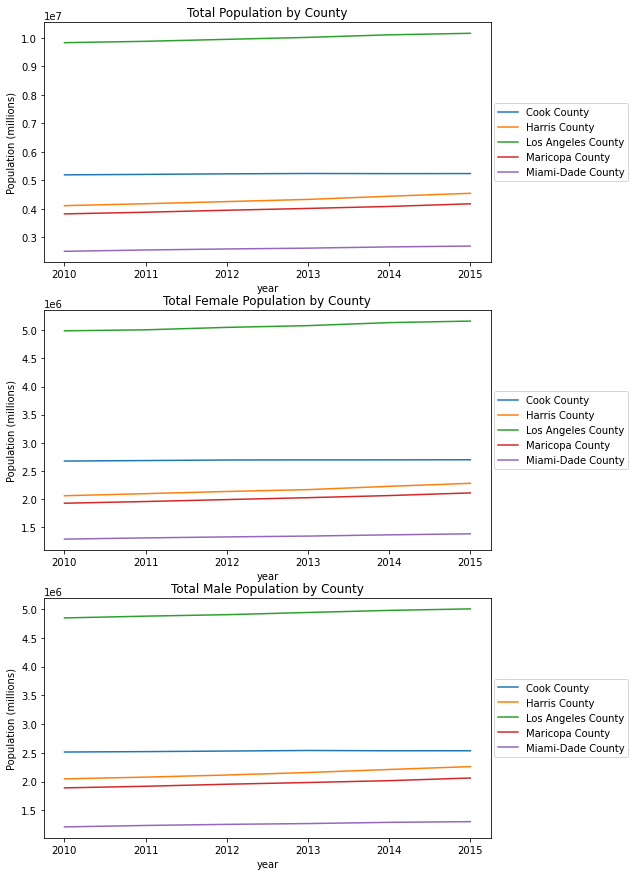

In [318]:
# making new tables to make a line plot with each line representing a different county
# each is using a different total population demongraphic for the values
fig, ax = plt.subplots(3, 1, figsize=(8,15))
large_counties.pivot_table(values='total_population', index='year', columns='county name')\
    .plot(title='Total Population by County', ylabel='Population (millions)', ax=ax[0])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='female_total_population', index='year', columns='county name')\
    .plot(title='Total Female Population by County', ylabel='Population (millions)', ax=ax[1])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='male_total_population', index='year', columns='county name')\
    .plot(title='Total Male Population by County', ylabel='Population (millions)', ax=ax[2])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5));

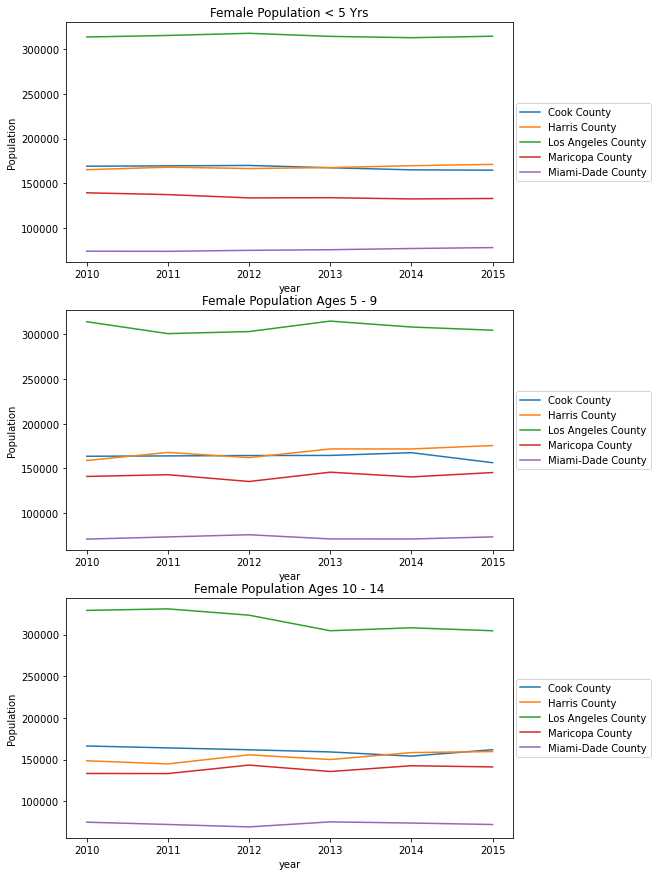

In [347]:
# making new tables to make a line plot with each line representing a different county
# each is using a different total population demongraphic for the values
fig, ax = plt.subplots(3, 1, figsize=(8,15))
large_counties.pivot_table(values='female_age_under_5', index='year', columns='county name')\
    .plot(title='Female Population < 5 Yrs', ylabel='Population', ax=ax[0])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='female_age_5_to_9', index='year', columns='county name')\
    .plot(title='Female Population Ages 5 - 9', ylabel='Population', ax=ax[1])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='female_age_10_to_14', index='year', columns='county name')\
    .plot(title='Female Population Ages 10 - 14', ylabel='Population', ax=ax[2])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5));

> It appears that the female population for ages 10 - 14 in Los Angeles County had a drop in 2013 and then stabilized. 

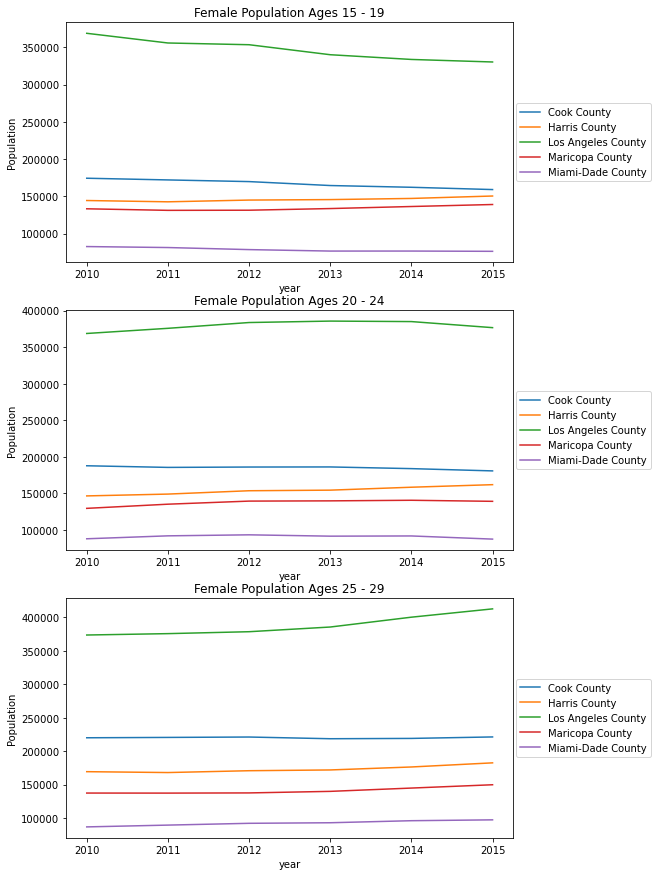

In [348]:
# making new tables to make a line plot with each line representing a different county
# each is using a different total population demongraphic for the values
fig, ax = plt.subplots(3, 1, figsize=(8,15))
large_counties.pivot_table(values='female_age_15_to_19', index='year', columns='county name')\
    .plot(title='Female Population Ages 15 - 19', ylabel='Population', ax=ax[0])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='female_age_20_to_24', index='year', columns='county name')\
    .plot(title='Female Population Ages 20 - 24', ylabel='Population', ax=ax[1])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='female_age_25_to_29', index='year', columns='county name')\
    .plot(title='Female Population Ages 25 - 29', ylabel='Population', ax=ax[2])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5));

> There's been a steady decrease in the female population for ages 15 - 19 in Los Angeles County, with a steady increase in the female population for ages 25 - 29. This inverse relationship could be due to the fact that these females are aging out of the one category and entering the latter group during this timeline.

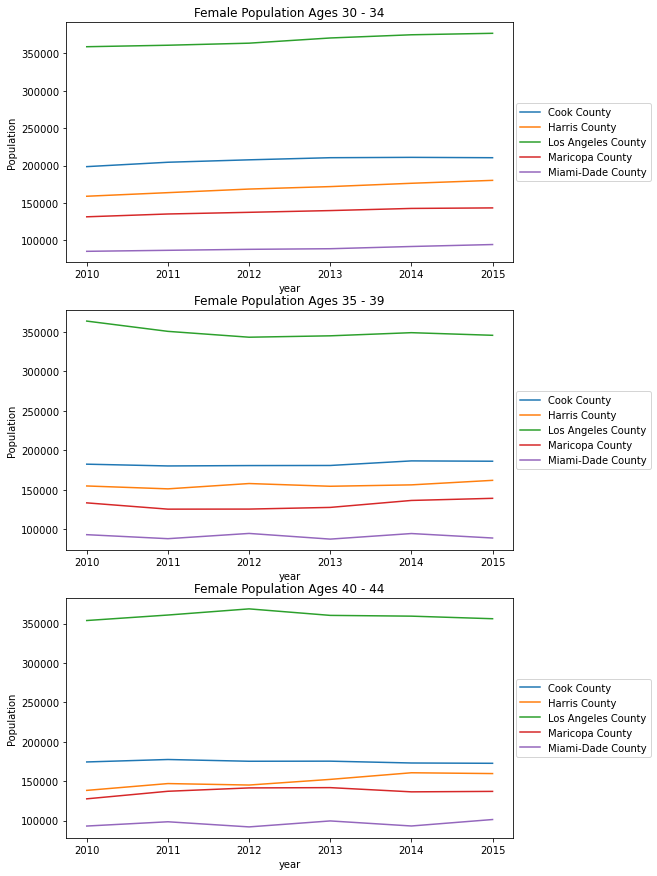

In [349]:
# making new tables to make a line plot with each line representing a different county
# each is using a different total population demongraphic for the values
fig, ax = plt.subplots(3, 1, figsize=(8,15))
large_counties.pivot_table(values='female_age_30_to_34', index='year', columns='county name')\
    .plot(title='Female Population Ages 30 - 34', ylabel='Population', ax=ax[0])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='female_age_35_to_39', index='year', columns='county name')\
    .plot(title='Female Population Ages 35 - 39', ylabel='Population', ax=ax[1])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='female_age_40_to_44', index='year', columns='county name')\
    .plot(title='Female Population Ages 40 - 44', ylabel='Population', ax=ax[2])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5));

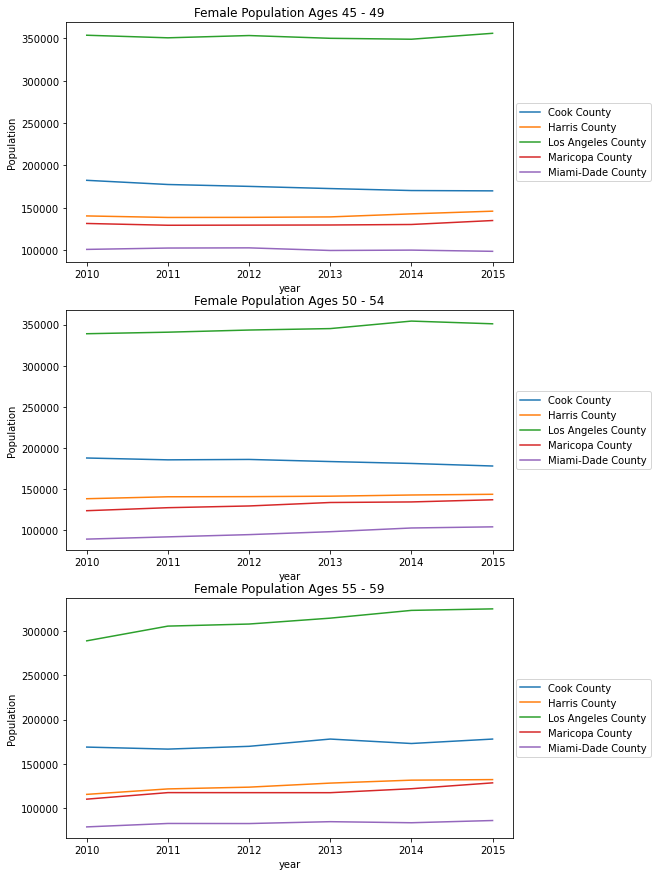

In [350]:
# making new tables to make a line plot with each line representing a different county
# each is using a different total population demongraphic for the values
fig, ax = plt.subplots(3, 1, figsize=(8,15))
large_counties.pivot_table(values='female_age_45_to_49', index='year', columns='county name')\
    .plot(title='Female Population Ages 45 - 49', ylabel='Population', ax=ax[0])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='female_age_50_to_54', index='year', columns='county name')\
    .plot(title='Female Population Ages 50 - 54', ylabel='Population', ax=ax[1])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='female_age_55_to_59', index='year', columns='county name')\
    .plot(title='Female Population Ages 55 - 59', ylabel='Population', ax=ax[2])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5));

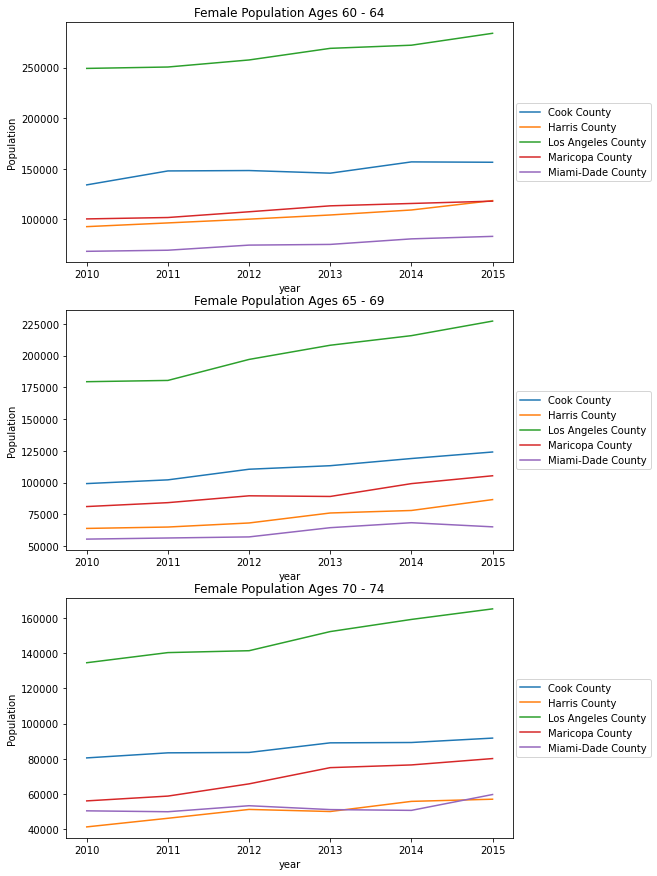

In [351]:
# making new tables to make a line plot with each line representing a different county
# each is using a different total population demongraphic for the values
fig, ax = plt.subplots(3, 1, figsize=(8,15))
large_counties.pivot_table(values='female_age_60_to_64', index='year', columns='county name')\
    .plot(title='Female Population Ages 60 - 64', ylabel='Population', ax=ax[0])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='female_age_65_to_69', index='year', columns='county name')\
    .plot(title='Female Population Ages 65 - 69', ylabel='Population', ax=ax[1])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='female_age_70_to_74', index='year', columns='county name')\
    .plot(title='Female Population Ages 70 - 74', ylabel='Population', ax=ax[2])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5));

> In all of these categories above, the female population for each county has steadily increased each year, with the biggest gain in Los Angeles County.

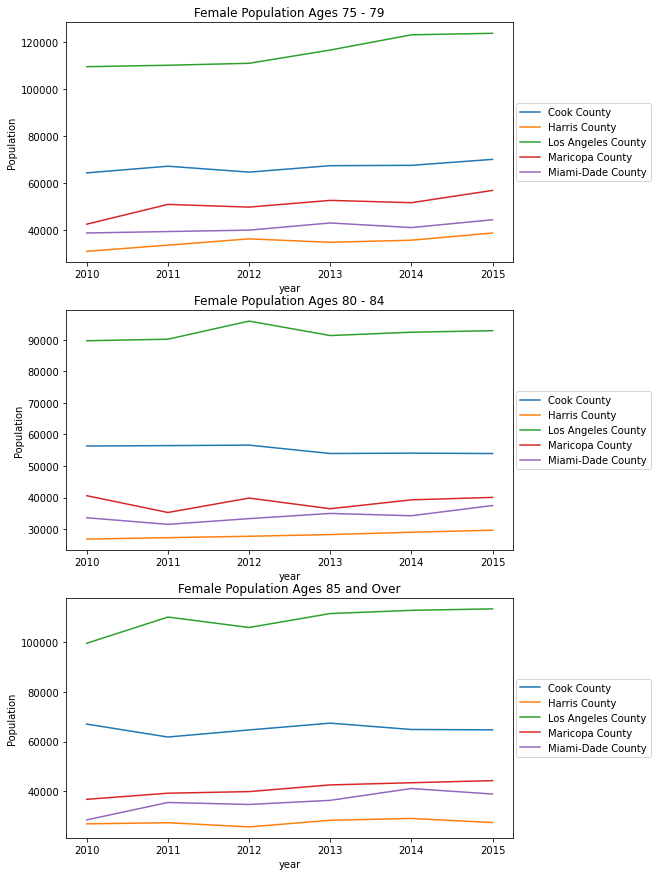

In [352]:
# making new tables to make a line plot with each line representing a different county
# each is using a different total population demongraphic for the values
fig, ax = plt.subplots(3, 1, figsize=(8,15))
large_counties.pivot_table(values='female_age_75_to_79', index='year', columns='county name')\
    .plot(title='Female Population Ages 75 - 79', ylabel='Population', ax=ax[0])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='female_age_80_to_84', index='year', columns='county name')\
    .plot(title='Female Population Ages 80 - 84', ylabel='Population', ax=ax[1])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='female_age_85_and_over', index='year', columns='county name')\
    .plot(title='Female Population Ages 85 and Over', ylabel='Population', ax=ax[2])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5));

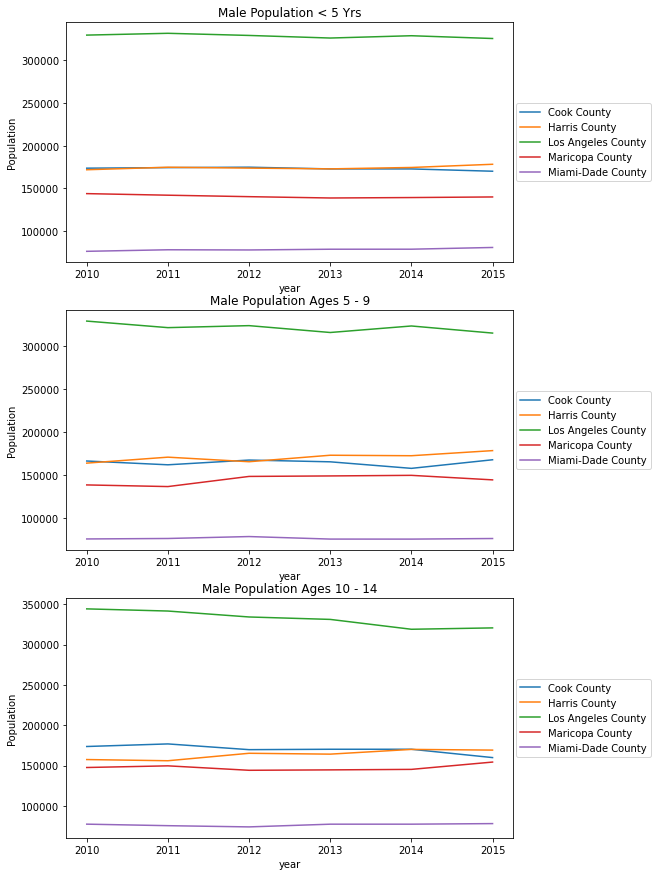

In [353]:
# making new tables to make a line plot with each line representing a different county
# each is using a different total population demongraphic for the values
fig, ax = plt.subplots(3, 1, figsize=(8,15))
large_counties.pivot_table(values='male_age_under_5', index='year', columns='county name')\
    .plot(title='Male Population < 5 Yrs', ylabel='Population', ax=ax[0])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='male_age_5_to_9', index='year', columns='county name')\
    .plot(title='Male Population Ages 5 - 9', ylabel='Population', ax=ax[1])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='male_age_10_to_14', index='year', columns='county name')\
    .plot(title='Male Population Ages 10 - 14', ylabel='Population', ax=ax[2])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5));

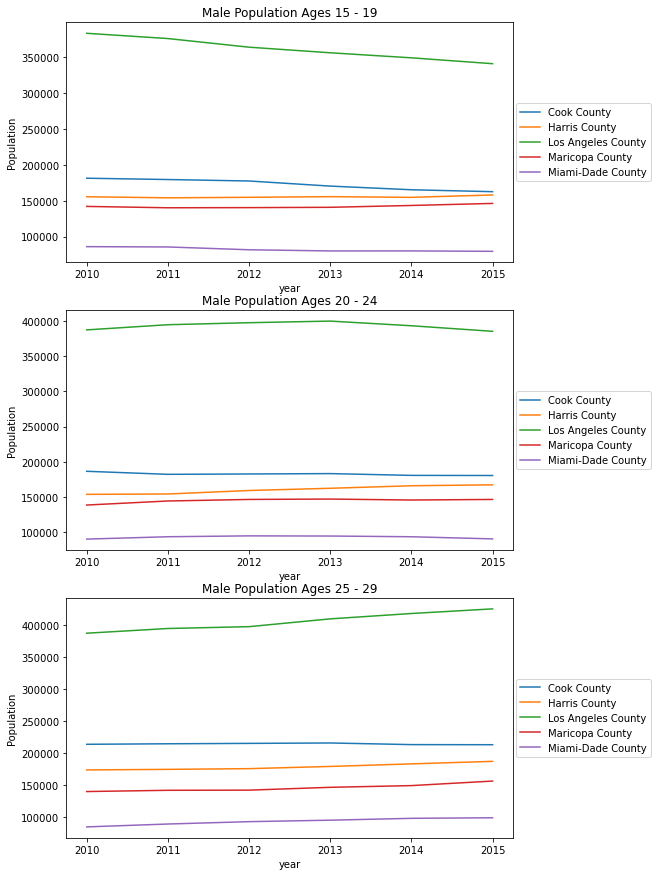

In [354]:
# making new tables to make a line plot with each line representing a different county
# each is using a different total population demongraphic for the values
fig, ax = plt.subplots(3, 1, figsize=(8,15))
large_counties.pivot_table(values='male_age_15_to_19', index='year', columns='county name')\
    .plot(title='Male Population Ages 15 - 19', ylabel='Population', ax=ax[0])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='male_age_20_to_24', index='year', columns='county name')\
    .plot(title='Male Population Ages 20 - 24', ylabel='Population', ax=ax[1])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='male_age_25_to_29', index='year', columns='county name')\
    .plot(title='Male Population Ages 25 - 29', ylabel='Population', ax=ax[2])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5));

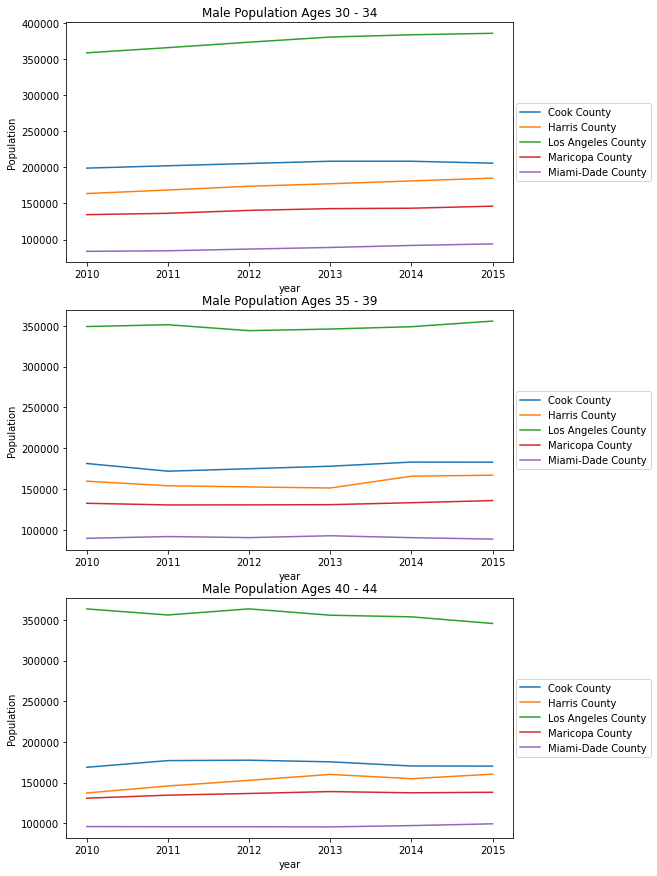

In [355]:
# making new tables to make a line plot with each line representing a different county
# each is using a different total population demongraphic for the values
fig, ax = plt.subplots(3, 1, figsize=(8,15))
large_counties.pivot_table(values='male_age_30_to_34', index='year', columns='county name')\
    .plot(title='Male Population Ages 30 - 34', ylabel='Population', ax=ax[0])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='male_age_35_to_39', index='year', columns='county name')\
    .plot(title='Male Population Ages 35 - 39', ylabel='Population', ax=ax[1])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='male_age_40_to_44', index='year', columns='county name')\
    .plot(title='Male Population Ages 40 - 44', ylabel='Population', ax=ax[2])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5));

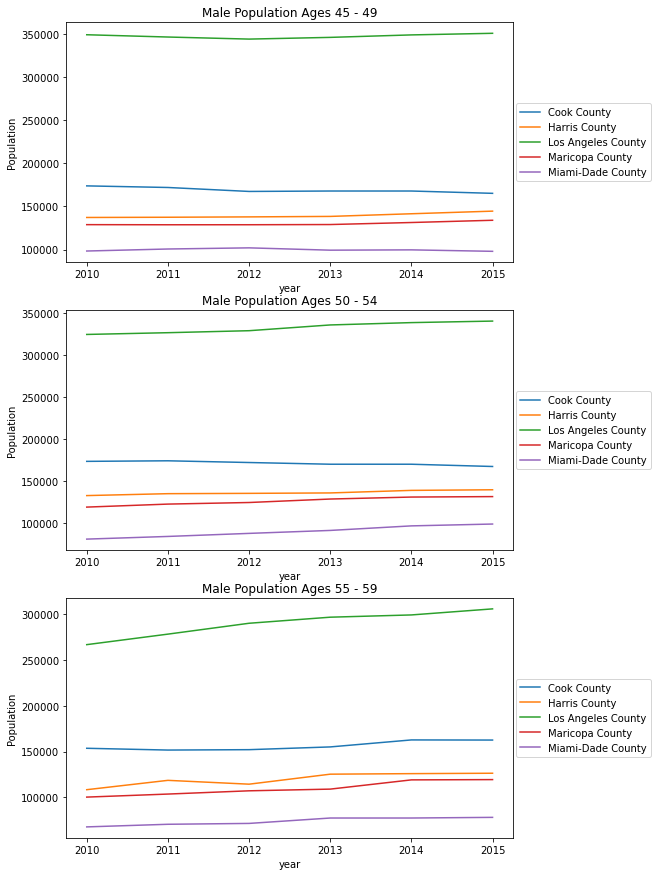

In [356]:
# making new tables to make a line plot with each line representing a different county
# each is using a different total population demongraphic for the values
fig, ax = plt.subplots(3, 1, figsize=(8,15))
large_counties.pivot_table(values='male_age_45_to_49', index='year', columns='county name')\
    .plot(title='Male Population Ages 45 - 49', ylabel='Population', ax=ax[0])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='male_age_50_to_54', index='year', columns='county name')\
    .plot(title='Male Population Ages 50 - 54', ylabel='Population', ax=ax[1])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='male_age_55_to_59', index='year', columns='county name')\
    .plot(title='Male Population Ages 55 - 59', ylabel='Population', ax=ax[2])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5));

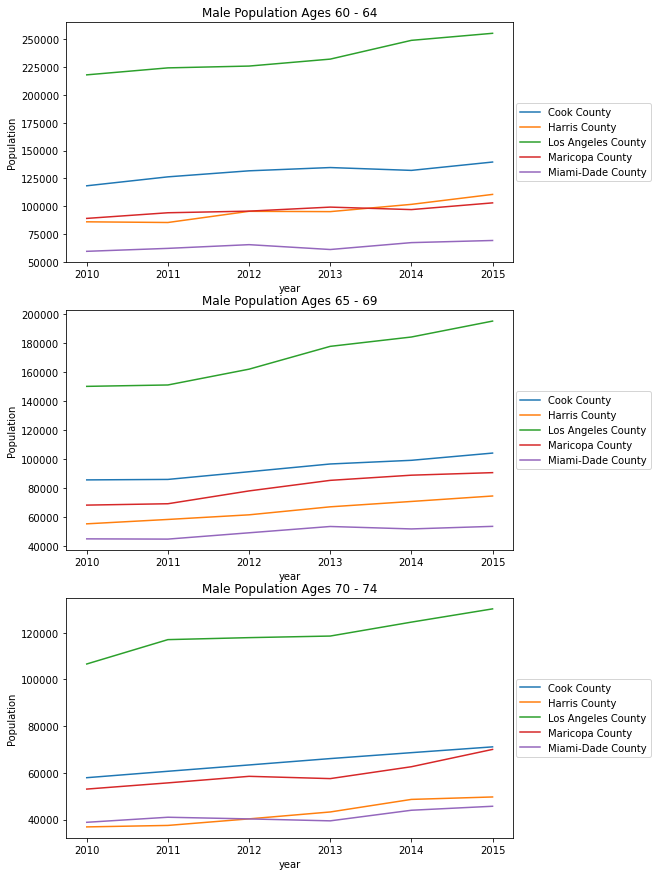

In [357]:
# making new tables to make a line plot with each line representing a different county
# each is using a different total population demongraphic for the values
fig, ax = plt.subplots(3, 1, figsize=(8,15))
large_counties.pivot_table(values='male_age_60_to_64', index='year', columns='county name')\
    .plot(title='Male Population Ages 60 - 64', ylabel='Population', ax=ax[0])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='male_age_65_to_69', index='year', columns='county name')\
    .plot(title='Male Population Ages 65 - 69', ylabel='Population', ax=ax[1])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='male_age_70_to_74', index='year', columns='county name')\
    .plot(title='Male Population Ages 70 - 74', ylabel='Population', ax=ax[2])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5));

> The male population in these categories is steadily increasing for most of the counties, with the biggest gains in Los Angeles County.

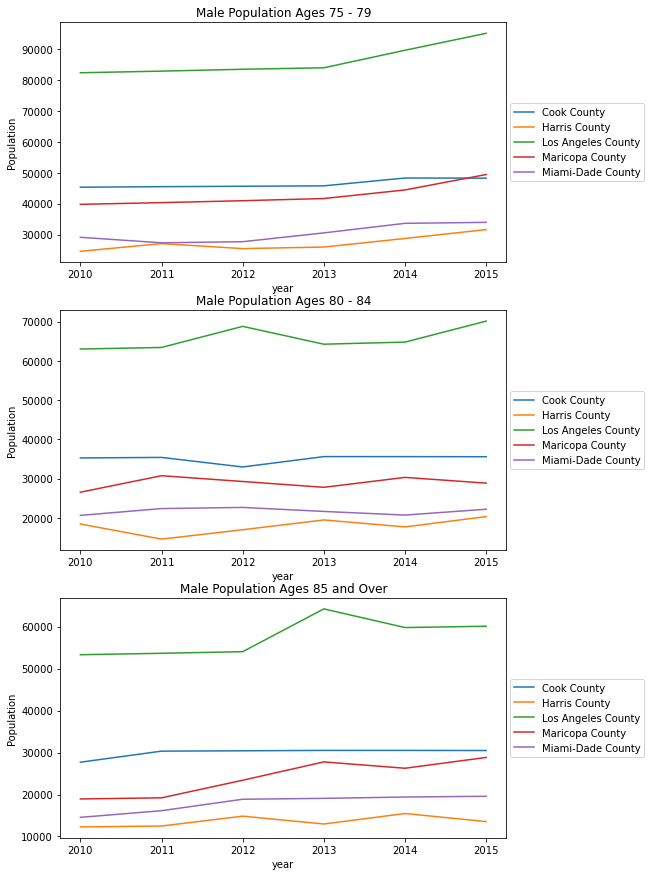

In [358]:
# making new tables to make a line plot with each line representing a different county
# each is using a different total population demongraphic for the values
fig, ax = plt.subplots(3, 1, figsize=(8,15))
large_counties.pivot_table(values='male_age_75_to_79', index='year', columns='county name')\
    .plot(title='Male Population Ages 75 - 79', ylabel='Population', ax=ax[0])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='male_age_80_to_84', index='year', columns='county name')\
    .plot(title='Male Population Ages 80 - 84', ylabel='Population', ax=ax[1])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5))
large_counties.pivot_table(values='male_age_85_and_over', index='year', columns='county name')\
    .plot(title='Male Population Ages 85 and Over', ylabel='Population', ax=ax[2])\
    .legend(loc='center right', bbox_to_anchor=(1.32, 0.5));

> There was a spike in the male population in Los Angeles County for the ages of 75 - 79 and 85 and over in 2013.

There were some spikes in the different population demographics in some of the age ranges and years, but it didn't look like anything very significant was sticking out to me.

4. If you were to continue analyzing all of the counties provided in this data set, what would your next steps be?

As far as next steps, I might next go into the details for the smaller counties and see if there were any significant changes there. I would also look at which counties had the largest male total population and which ones had the largest female total population, in case they differ from the list of the largest by total population overall.

# Part Two: Top 10 Best Cities to Live In

### 1. Import and clean the data set (if needed).

In [359]:
data_2 = pd.read_csv('top_ten_small_cities_US.csv')

In [361]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             20 non-null     object
 1   State            20 non-null     object
 2   County           20 non-null     object
 3   Rank             20 non-null     int64 
 4   Year             20 non-null     int64 
 5   City_Population  20 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.1+ KB


In [480]:
data_2

,City,State,County,Rank,Year,City_Population
0,Apex,NC,Wake County,9,2013,40205
1,Berkeley Heights,NJ,Union County,6,2013,13345
2,Carmel,IN,Hamilton County,1,2012,80100
3,Chanhassen,MN,Carver County,4,2013,23685
4,Chapel Hill,NC,Orange County,10,2012,59000
5,Columbia/Ellicott City,MD,Howard County,8,2012,100700
6,Eden Prairie,MN,Hennepin County,3,2012,61200
7,Irvine,CA,Orange County,6,2012,213600
8,Louisville,CO,Boulder County,2,2013,18924
9,Mason,OH,Warren County,7,2013,31761


### 2. Merge this data set with the US Population data from part one. The resulting data set should contain information for only the counties mentioned in the top_ten_small_cities_US file, but should contain data for all 6 years (2010 through 2015).

In [535]:
# making a list of the counties in the top ten cities df
counties_2 = data_2['County'].unique().tolist()

In [536]:
# filtering the original dataset to just have those counties in the top cities df
data_counties = data[data['county name'].isin(counties_2)]
data_counties.head()

,county name,state,year,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_45_to_49,male_age_50_to_54,male_age_55_to_59,male_age_60_to_64,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,total_population
123,Sarpy County,Nebraska,2010,80380,6504,6585,5701,5059,4898,6023,...,6035,5320,3970,3494,2303,1668,1350,318,476,159789
275,Sarpy County,Nebraska,2011,81759,6371,6207,6207,4982,5636,6289,...,5905,5824,4691,3154,2103,1860,1213,404,728,162643
328,Johnson County,Iowa,2015,73339,3968,4556,3821,6908,11317,5879,...,3609,3680,3538,3467,2264,2052,1132,425,920,144104
385,Orange County,Texas,2013,41977,2393,2477,2938,2561,2854,2519,...,2746,3196,2746,2500,1803,1352,1106,451,492,82957
389,Orange County,Texas,2012,41757,2628,2711,2461,3421,2461,2294,...,2600,3260,2682,2765,1692,1403,990,454,619,82978


#### Checking each county in the top cities dataset to see if there is more than one county with that name in the first dataset

In [537]:
data_counties['state'].unique()

array(['Nebraska', 'Iowa', 'Texas', 'Minnesota', 'Indiana', 'New York',
       'Kentucky', 'New Jersey', 'North Carolina', 'Arkansas',
       'Tennessee', 'Wisconsin', 'Rhode Island', 'Ohio', 'Maryland',
       'Colorado', 'Connecticut', 'Utah', 'Pennsylvania', 'Oregon',
       'Kansas', 'Massachusetts', 'Virginia', 'Florida', 'Washington',
       'California'], dtype=object)

In [538]:
# changing the state names to abbreviations for comparisons
data_counties['state'].replace('Nebraska', 'NE', inplace=True)
data_counties['state'].replace('Iowa', 'IA', inplace=True)
data_counties['state'].replace('Texas', 'TX', inplace=True)
data_counties['state'].replace('Minnesota', 'MN', inplace=True)
data_counties['state'].replace('Indiana', 'IN', inplace=True)
data_counties['state'].replace('New York', 'NY', inplace=True)
data_counties['state'].replace('Kentucky', 'KY', inplace=True)
data_counties['state'].replace('New Jersey', 'NJ', inplace=True)
data_counties['state'].replace('North Carolina', 'NC', inplace=True)
data_counties['state'].replace('Arkansas', 'AR', inplace=True)
data_counties['state'].replace('Tennessee', 'TN', inplace=True)
data_counties['state'].replace('Wisconsin', 'WI', inplace=True)
data_counties['state'].replace('Rhode Island', 'RI', inplace=True)
data_counties['state'].replace('Ohio', 'OH', inplace=True)
data_counties['state'].replace('Maryland', 'MD', inplace=True)
data_counties['state'].replace('Colorado', 'CO', inplace=True)
data_counties['state'].replace('Connecticut', 'CT', inplace=True)
data_counties['state'].replace('Utah', 'UT', inplace=True)
data_counties['state'].replace('Pennsylvania', 'PA', inplace=True)
data_counties['state'].replace('Oregon', 'OR', inplace=True)
data_counties['state'].replace('Kansas', 'KS', inplace=True)
data_counties['state'].replace('Massachusetts', 'MA', inplace=True)
data_counties['state'].replace('Virginia', 'VA', inplace=True)
data_counties['state'].replace('Florida', 'FL', inplace=True)
data_counties['state'].replace('Washington', 'WA', inplace=True)
data_counties['state'].replace('California', 'CA', inplace=True)

In [539]:
data_final = data_2.merge(data_counties, how='outer', left_on='County', right_on='county name')
data_final

,City,State,County,Rank,Year,City_Population,county name,state,year,female_total_population,...,male_age_45_to_49,male_age_50_to_54,male_age_55_to_59,male_age_60_to_64,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,total_population
0,Apex,NC,Wake County,9,2013,40205,Wake County,NC,2012,488688,...,34760,31979,25490,20392,14831,9733,5562,3708,3708,952151
1,Apex,NC,Wake County,9,2013,40205,Wake County,NC,2010,464264,...,34017,30041,23414,18555,13253,7952,5301,3976,2209,906923
2,Apex,NC,Wake County,9,2013,40205,Wake County,NC,2013,500063,...,35130,33231,28958,19464,15191,10919,6171,4273,4273,975738
3,Apex,NC,Wake County,9,2013,40205,Wake County,NC,2014,512402,...,35985,34527,29177,21397,17993,10212,7294,4377,3404,999177
4,Apex,NC,Wake County,9,2013,40205,Wake County,NC,2011,477661,...,34776,31163,23937,20775,13549,8130,5871,4516,2258,929302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,West Goshen Township,PA,Chester County,10,2013,22421,Chester County,PA,2014,260985,...,18438,20206,19196,15660,12124,7830,6062,3284,3031,513312
282,West Goshen Township,PA,Chester County,10,2013,22421,Chester County,PA,2011,256831,...,19786,20280,16571,14839,9398,7667,5441,3463,3215,503907
283,West Goshen Township,PA,Chester County,10,2013,22421,Chester County,PA,2010,253470,...,19932,19686,17471,12796,10089,6398,4675,3937,3199,499789
284,West Goshen Township,PA,Chester County,10,2013,22421,Chester County,PA,2012,258131,...,19647,20145,17409,14922,9948,7958,4974,4228,3233,506833


In [540]:
# creating column to compare whether the different state columns are the same
data_final['equal'] = np.where(data_final['State'] != data_final['state'], False, True)
data_final.head(10)

,City,State,County,Rank,Year,City_Population,county name,state,year,female_total_population,...,male_age_50_to_54,male_age_55_to_59,male_age_60_to_64,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,total_population,equal
0,Apex,NC,Wake County,9,2013,40205,Wake County,NC,2012,488688,...,31979,25490,20392,14831,9733,5562,3708,3708,952151,True
1,Apex,NC,Wake County,9,2013,40205,Wake County,NC,2010,464264,...,30041,23414,18555,13253,7952,5301,3976,2209,906923,True
2,Apex,NC,Wake County,9,2013,40205,Wake County,NC,2013,500063,...,33231,28958,19464,15191,10919,6171,4273,4273,975738,True
3,Apex,NC,Wake County,9,2013,40205,Wake County,NC,2014,512402,...,34527,29177,21397,17993,10212,7294,4377,3404,999177,True
4,Apex,NC,Wake County,9,2013,40205,Wake County,NC,2011,477661,...,31163,23937,20775,13549,8130,5871,4516,2258,929302,True
5,Apex,NC,Wake County,9,2013,40205,Wake County,NC,2015,525379,...,35416,30428,22946,16461,13468,6983,4988,2993,1023699,True
6,Berkeley Heights,NJ,Union County,6,2013,13345,Union County,NC,2010,103260,...,6530,5145,4848,2869,2474,1682,693,495,202305,False
7,Berkeley Heights,NJ,Union County,6,2013,13345,Union County,NC,2012,105362,...,7515,5559,4633,4118,2368,1750,824,824,208206,False
8,Berkeley Heights,NJ,Union County,6,2013,13345,Union County,NC,2013,108129,...,7968,6395,4928,4089,2621,1573,1048,839,212972,False
9,Berkeley Heights,NJ,Union County,6,2013,13345,Union County,NC,2014,111051,...,7940,6330,5150,3970,3541,1609,1180,644,218452,False


In [541]:
# filtering out the rows where the states don't match
data_final = data_final[data_final['equal'] == True]
data_final

,City,State,County,Rank,Year,City_Population,county name,state,year,female_total_population,...,male_age_50_to_54,male_age_55_to_59,male_age_60_to_64,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,total_population,equal
0,Apex,NC,Wake County,9,2013,40205,Wake County,NC,2012,488688,...,31979,25490,20392,14831,9733,5562,3708,3708,952151,True
1,Apex,NC,Wake County,9,2013,40205,Wake County,NC,2010,464264,...,30041,23414,18555,13253,7952,5301,3976,2209,906923,True
2,Apex,NC,Wake County,9,2013,40205,Wake County,NC,2013,500063,...,33231,28958,19464,15191,10919,6171,4273,4273,975738,True
3,Apex,NC,Wake County,9,2013,40205,Wake County,NC,2014,512402,...,34527,29177,21397,17993,10212,7294,4377,3404,999177,True
4,Apex,NC,Wake County,9,2013,40205,Wake County,NC,2011,477661,...,31163,23937,20775,13549,8130,5871,4516,2258,929302,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,West Goshen Township,PA,Chester County,10,2013,22421,Chester County,PA,2014,260985,...,20206,19196,15660,12124,7830,6062,3284,3031,513312,True
282,West Goshen Township,PA,Chester County,10,2013,22421,Chester County,PA,2011,256831,...,20280,16571,14839,9398,7667,5441,3463,3215,503907,True
283,West Goshen Township,PA,Chester County,10,2013,22421,Chester County,PA,2010,253470,...,19686,17471,12796,10089,6398,4675,3937,3199,499789,True
284,West Goshen Township,PA,Chester County,10,2013,22421,Chester County,PA,2012,258131,...,20145,17409,14922,9948,7958,4974,4228,3233,506833,True


> Now the only counties left in the final dataset are those from the same state as the top cities dataset

In [542]:
# getting rid of duplicate columns after the merge
data_final.drop(columns=['county name', 'state', 'equal'], inplace=True)

In [543]:
# changing the name for the year column from the top cities to distinguish from other year column
data_final.rename(columns={'Year':'rank_year'}, inplace=True)
data_final.head()

,City,State,County,Rank,rank_year,City_Population,year,female_total_population,female_age_under_5,female_age_5_to_9,...,male_age_45_to_49,male_age_50_to_54,male_age_55_to_59,male_age_60_to_64,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,total_population
0,Apex,NC,Wake County,9,2013,40205,2012,488688,31765,34208,...,34760,31979,25490,20392,14831,9733,5562,3708,3708,952151
1,Apex,NC,Wake County,9,2013,40205,2010,464264,32564,32564,...,34017,30041,23414,18555,13253,7952,5301,3976,2209,906923
2,Apex,NC,Wake County,9,2013,40205,2013,500063,31472,35969,...,35130,33231,28958,19464,15191,10919,6171,4273,4273,975738
3,Apex,NC,Wake County,9,2013,40205,2014,512402,31769,36893,...,35985,34527,29177,21397,17993,10212,7294,4377,3404,999177
4,Apex,NC,Wake County,9,2013,40205,2011,477661,32035,33470,...,34776,31163,23937,20775,13549,8130,5871,4516,2258,929302


### 3. What percent of the total population for each county resides in each of the cities on the list? (for example, what percent of Hamilton County resides in Carmel, IN?)

In [544]:
# creating column for percent of total population
data_final['percent_pop'] = ((data_final['City_Population'] / data_final['total_population']) * 100).round(2)

In [545]:
data_final.head()

,City,State,County,Rank,rank_year,City_Population,year,female_total_population,female_age_under_5,female_age_5_to_9,...,male_age_50_to_54,male_age_55_to_59,male_age_60_to_64,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,total_population,percent_pop
0,Apex,NC,Wake County,9,2013,40205,2012,488688,31765,34208,...,31979,25490,20392,14831,9733,5562,3708,3708,952151,4.22
1,Apex,NC,Wake County,9,2013,40205,2010,464264,32564,32564,...,30041,23414,18555,13253,7952,5301,3976,2209,906923,4.43
2,Apex,NC,Wake County,9,2013,40205,2013,500063,31472,35969,...,33231,28958,19464,15191,10919,6171,4273,4273,975738,4.12
3,Apex,NC,Wake County,9,2013,40205,2014,512402,31769,36893,...,34527,29177,21397,17993,10212,7294,4377,3404,999177,4.02
4,Apex,NC,Wake County,9,2013,40205,2011,477661,32035,33470,...,31163,23937,20775,13549,8130,5871,4516,2258,929302,4.33


> I realize I only have specific city population information for two years, 2012 and 2013. I went ahead and made the column with just the data for those two years anyway to get a general gist. However, it would be more accurate if we had specific city population information for each of the year in the dataset for comparison.

In [726]:
data_final[['City', 'County', 'State', 'percent_pop']].groupby(by=['City', 'State', 'County']).mean().round(2)

,,,percent_pop
City,State,County,
Apex,NC,Wake County,4.18
Berkeley Heights,NJ,Union County,2.44
Carmel,IN,Hamilton County,27.38
Chanhassen,MN,Carver County,24.98
Chapel Hill,NC,Orange County,42.66
Columbia/Ellicott City,MD,Howard County,33.45
Eden Prairie,MN,Hennepin County,5.14
Irvine,CA,Orange County,6.90
Louisville,CO,Boulder County,6.17


> Above we have the average percentage of the population for each city and county listed.

### 4. Are there any shared population characteristics of these counties that made the Top Ten list? Please explain.

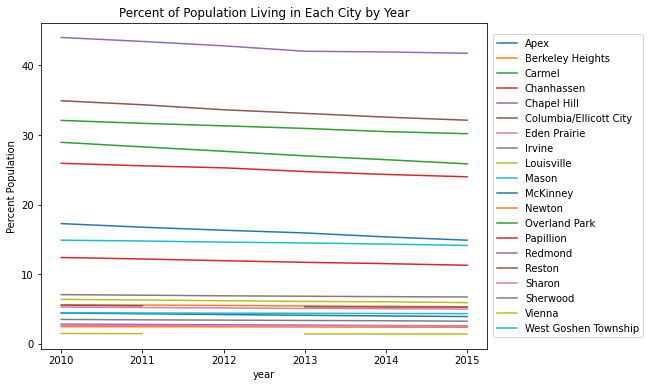

In [724]:
data_final.pivot_table(index='year', columns='City', values='percent_pop').plot\
    (figsize=(8,6), title='Percent of Population Living in Each City by Year', ylabel='Percent Population')\
    .legend(loc='center right', bbox_to_anchor=(1.36, 0.5));

> Above we have a graph of the percent of the population living in each city that made the Top Ten list. You can see that the percentage of the population doesn't seem to change much, if anything it decreases in some cities over the years.

It looks like over half of these counties in the Top Ten list have the percent of the population living there under 10%. Very few of these counties have a significant portion of the population living there. In addition, the percentage doesn't seem to change much year to year.

### 5. Please provide at least one visualization of Fairfax County, Virginia. This should include an indication of the year(s) any of the cities in this county made it in CNN’s Top Ten Cities list.

In [588]:
# filtering the data to just fairfax county
fairfax = data_final[data_final['County'] == 'Fairfax County']
fairfax

,City,State,County,Rank,rank_year,City_Population,year,female_total_population,female_age_under_5,female_age_5_to_9,...,male_age_50_to_54,male_age_55_to_59,male_age_60_to_64,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,total_population,percent_pop
210,Reston,VA,Fairfax County,7,2012,60300,2010,549398,35747,35747,...,41333,34355,30061,19325,11809,7515,5368,4831,1086730,5.55
211,Reston,VA,Fairfax County,7,2012,60300,2013,570804,37102,38244,...,42569,38648,29126,24085,12883,9522,5601,4481,1130364,5.33
212,Reston,VA,Fairfax County,7,2012,60300,2014,575282,37319,37893,...,42819,38875,29860,24226,14649,9578,5634,5634,1138123,5.30
213,Reston,VA,Fairfax County,7,2012,60300,2011,555959,36137,37249,...,41944,31595,34318,20155,12529,8171,5992,3813,1099603,5.48
214,Reston,VA,Fairfax County,7,2012,60300,2015,577102,37474,38627,...,41862,36771,33377,24325,15840,9617,6789,5091,1142245,5.28
215,Vienna,VA,Fairfax County,3,2013,16285,2010,549398,35747,35747,...,41333,34355,30061,19325,11809,7515,5368,4831,1086730,1.50
216,Vienna,VA,Fairfax County,3,2013,16285,2013,570804,37102,38244,...,42569,38648,29126,24085,12883,9522,5601,4481,1130364,1.44
217,Vienna,VA,Fairfax County,3,2013,16285,2014,575282,37319,37893,...,42819,38875,29860,24226,14649,9578,5634,5634,1138123,1.43
218,Vienna,VA,Fairfax County,3,2013,16285,2011,555959,36137,37249,...,41944,31595,34318,20155,12529,8171,5992,3813,1099603,1.48
219,Vienna,VA,Fairfax County,3,2013,16285,2015,577102,37474,38627,...,41862,36771,33377,24325,15840,9617,6789,5091,1142245,1.43


In [692]:
# creating pivot table for easier graphing
fairfax_tbl = fairfax.pivot_table(index='year', values='total_population', columns='County')
fairfax_tbl

County,Fairfax County
year,
2010,1086730
2011,1099603
2013,1130364
2014,1138123
2015,1142245


> For some reason this data doesn't include information for the year 2012 for Fairfax County.

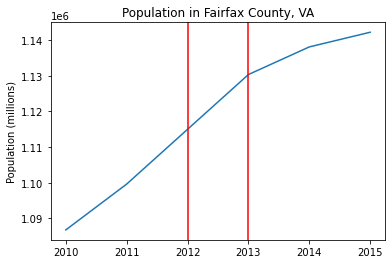

In [698]:
# plotting the total population increase for Fairfax county
plt.plot(fairfax_tbl)
plt.ylabel('Population (millions)')
plt.title('Population in Fairfax County, VA')
plt.axvline(x=2012, color='red') # adding vertical lines for the years it made the top 10 cities list
plt.axvline(x=2013, color='red');

> Above we have the increase in total population for Fairfax County in VA over the years 2010 - 2015. The vertical red lines indicate which years the county made it in CNN’s Top Ten Cities list. The population has definitely been on a steep increase in population throughout the years.